In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('NoOutliersDataset.csv', index_col= [0])

numerical = ["CO2 Emissions", "AFF", "Government Effectiveness", "Individuals using the Internet", "Life Expectancy", "Renewable Energy Consumption"]
categorical = ["Country", "Income Group", "Region"]
df

,Country,Income Group,Region,CO2 Emissions,AFF,Government Effectiveness,Individuals using the Internet,Life Expectancy,Renewable Energy Consumption
0,Afghanistan,Low income,South Asia,0.200151,22.042897,-1.453096,60.828447,64.486000,21.422701
1,Albania,Upper middle income,Europe & Central Asia,1.939732,18.440931,0.057240,65.400000,78.458000,38.266399
2,Algeria,Lower middle income,Middle East & North Africa,3.591657,11.840233,-0.527378,49.038468,76.693000,0.193300
3,Andorra,High income,Europe & Central Asia,5.973405,10.393144,1.943918,60.828447,72.210078,18.506001
4,Angola,Lower middle income,Sub-Saharan Africa,0.887380,8.607742,-1.045002,37.169226,60.782000,56.785500
...,...,...,...,...,...,...,...,...,...
188,"Venezuela, RB",Low income,Latin America & Caribbean,4.782755,10.393144,-1.584651,60.828447,72.128000,14.564700
189,Vietnam,Lower middle income,East Asia & Pacific,2.698806,14.681979,-0.001380,69.847929,75.317000,23.491800
190,"Yemen, Rep.",Low income,Middle East & North Africa,0.326682,5.000963,-2.230443,60.828447,66.096000,4.269000
191,Zambia,Lower middle income,Sub-Saharan Africa,0.446065,3.341147,-0.557072,37.169226,63.510000,85.104599


In [6]:
#contingency_table = pd.crosstab(df['Region'], df['Income Group'], margins =True, margins_name = "Total")

contingency_table_percentages = pd.crosstab(df['Region'], df['Income Group'], normalize = "index", margins =True, margins_name = "Total") 

contingency_table_percentages

Income Group,High income,Low income,Lower middle income,Upper middle income
Region,,,,
East Asia & Pacific,0.266667,0.033333,0.466667,0.233333
Europe & Central Asia,0.615385,0.000000,0.076923,0.307692
Latin America & Caribbean,0.212121,0.030303,0.181818,0.575758
Middle East & North Africa,0.400000,0.100000,0.300000,0.200000
North America,1.000000,0.000000,0.000000,0.000000
South Asia,0.000000,0.125000,0.750000,0.125000
Sub-Saharan Africa,0.020833,0.479167,0.375000,0.125000
Total,0.300518,0.145078,0.279793,0.274611


In [10]:
#test de concordanta 

freq_region = pd.crosstab(index=df['Region'], columns='count') #tabel de frecvente

stats.chisquare(freq_region)

Power_divergenceResult(statistic=array([77.75129534]), pvalue=array([1.04034955e-14]))

In [8]:
# ChiSquare test of association
def chi_square(df,var1,var2,alpha):
    chi_square = 0
    rows = df[var1].unique()
    columns = df[var2].unique()
    contingency_table = pd.crosstab(df[var1], df[var2], margins =True, margins_name = "Total")
    for i in columns:
        for j in rows:
            O = contingency_table[i][j]
            E = contingency_table[i]['Total'] * contingency_table['Total'][j] / contingency_table['Total']['Total']
            chi_square += (O-E)**2/E

    # The p-value approach
    print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
    p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
    conclusion = "Failed to reject the null hypothesis. Variables are independent."
    if p_value <= alpha:
        conclusion = "Null Hypothesis is rejected. Variables are associated."
            
    print("chisquare-score is %.3f and p-value is %.3f" % (chi_square,p_value))
    print(conclusion)
        
    # The critical value approach
    print("\n--------------------------------------------------------------------------------------")
    print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
    critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
    conclusion = "Failed to reject the null hypothesis. Variables are independent."
    if chi_square > critical_value:
        conclusion = "Null Hypothesis is rejected. Variables are associated."
            
    print("chisquare-score is %.3f and p-value is %.3f" % (chi_square,critical_value))
    print(conclusion)

chi_square(df, 'Region', 'Income Group', 0.05)


Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is 125.386 and p-value is 0.000
Null Hypothesis is rejected. Variables are associated.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is 125.386 and p-value is 28.869
Null Hypothesis is rejected. Variables are associated.


In [3]:
#analiza de corelatie
df.corr(method = 'pearson')

,CO2 Emissions,AFF,Government Effectiveness,Individuals using the Internet,Life Expectancy,Renewable Energy Consumption
CO2 Emissions,1.000000,-0.600037,0.592611,0.705459,0.580482,-0.598311
AFF,-0.600037,1.000000,-0.584218,-0.648310,-0.688161,0.605434
Government Effectiveness,0.592611,-0.584218,1.000000,0.656742,0.758598,-0.387770
Individuals using the Internet,0.705459,-0.648310,0.656742,1.000000,0.733923,-0.500591
Life Expectancy,0.580482,-0.688161,0.758598,0.733923,1.000000,-0.579824
Renewable Energy Consumption,-0.598311,0.605434,-0.387770,-0.500591,-0.579824,1.000000


<AxesSubplot:>

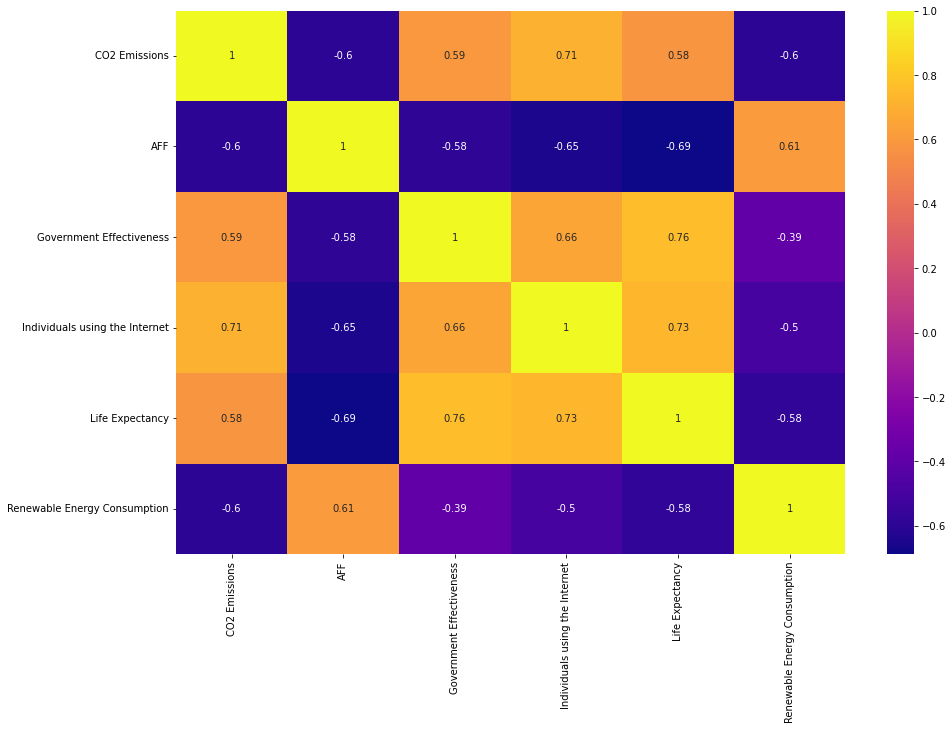

In [4]:
fig,ax = plt.subplots(figsize = (15,10))
sns.heatmap(df.corr(method = 'pearson'),cmap = 'plasma', annot= True)